# 🎬 Exploratory Data Analysis (EDA) of Netflix Movies and TV Shows

### 🎯 Objective
The goal of this project is to analyze the Netflix catalog to uncover:
- Trends in content addition over time  
- Ratings distribution  
- The most common genres and countries producing content  

We'll use Python libraries such as **Pandas**, **Matplotlib**, and **Seaborn** for analysis and visualization.






In [2]:
from google.colab import files
uploaded = files.upload()   # upload netflix_titles.csv manually

import pandas as pd
df = pd.read_csv('netflix_titles.csv')
print("Dataset Shape:", df.shape)
print("\n The first five rows:")
df.head()


Saving netflix_titles.csv to netflix_titles (1).csv
Dataset Shape: (8807, 12)

 The first five rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
# Check for missing values
print("Missing Values per Column:\n", df.isnull().sum())

# Fill missing values
#Step 1: Handle Missing Values
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Fill 'director' and 'cast' with 'Unknown' since they are text
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['duration'] = df['duration'].astype(str).str.lower().str.strip()
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
# ----------------------------------------

# Fill categorical columns with mode (most common value)
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify results
# Basic information
print("Dataset Info:")
df.info()

Missing Values per Column:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_int     3
duration_type    3
dtype: int64
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8807 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   durati

/tmp/ipython-input-150310086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


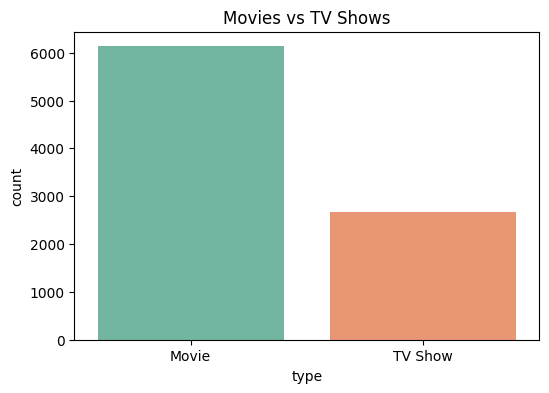

/tmp/ipython-input-150310086.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')


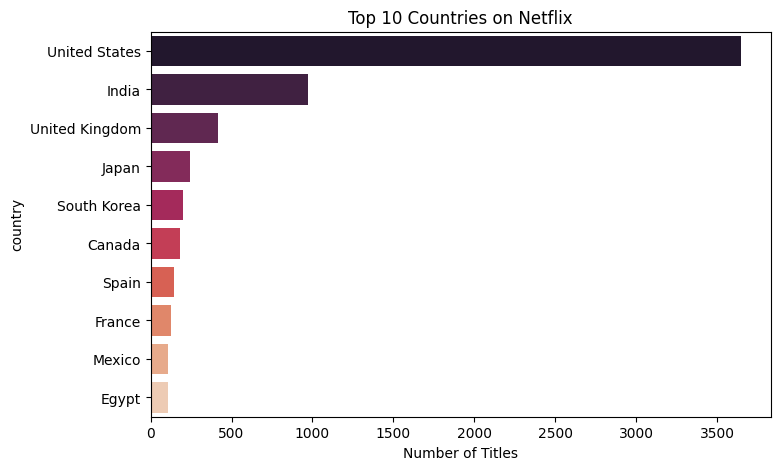

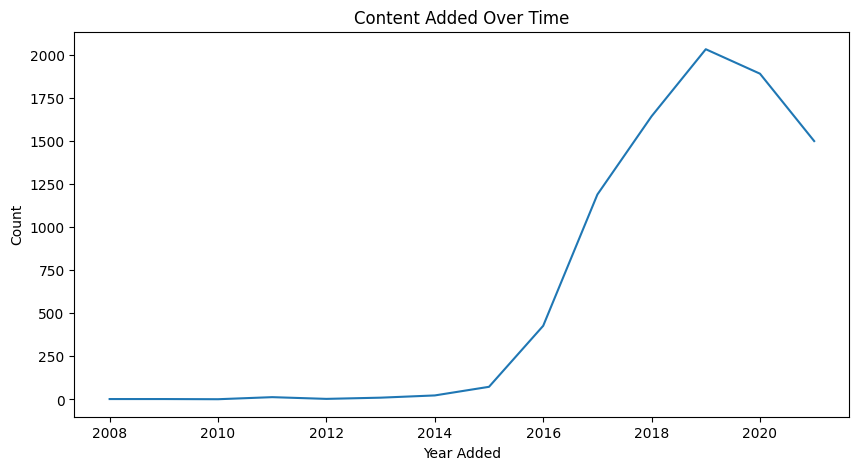

/tmp/ipython-input-150310086.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


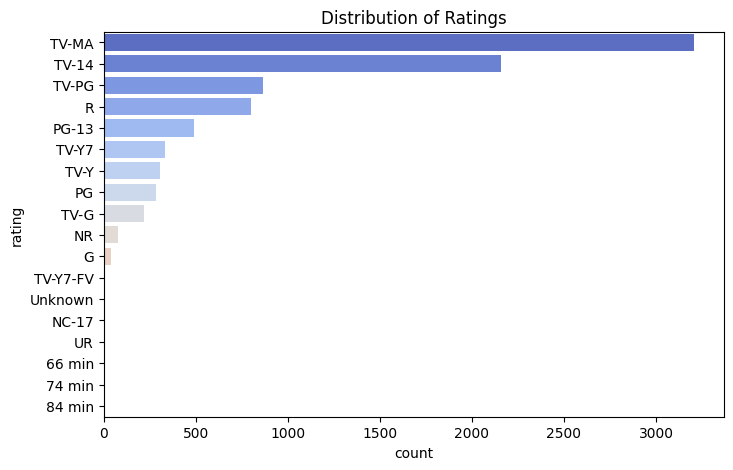

/tmp/ipython-input-150310086.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')


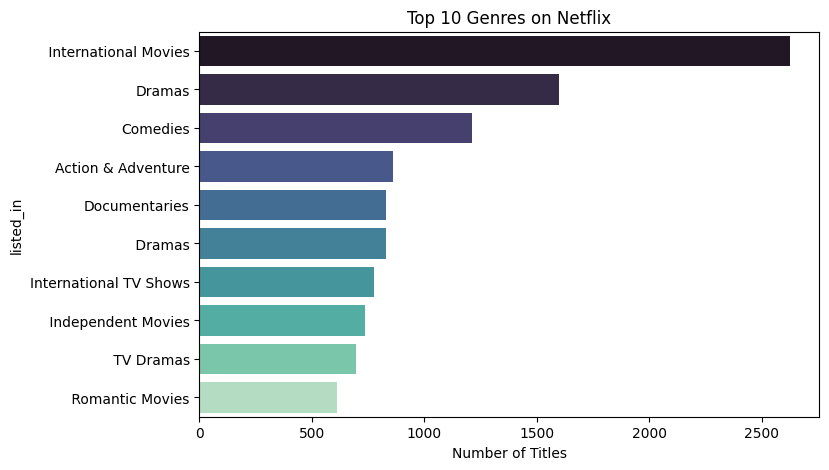

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows')
plt.show()

# 2️⃣ Top 10 countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Number of Titles')
plt.show()

# 3️⃣ Content added over time
df['year_added'] = df['date_added'].dt.year
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=content_by_year.index, y=content_by_year.values)
plt.title('Content Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

# 4️⃣ Ratings distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.show()

# 5️⃣ Top 10 Genres
plt.figure(figsize=(8,5))
genre_counts = df['listed_in'].str.split(',').explode().value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()


In [13]:
# Create a content age feature
df['release_year'] = df['release_year'].astype(int)
df['content_age'] = 2025 - df['release_year']

# Encode type (Movie=0, TV Show=1)
df['type_encoded'] = df['type'].map({'Movie':0, 'TV Show':1})

# Extract main genre
df['main_genre'] = df['listed_in'].str.split(',').str[0]

df[['title', 'type', 'release_year', 'content_age', 'main_genre']].head()


,title,type,release_year,content_age,main_genre
0,Dick Johnson Is Dead,Movie,2020,5,Documentaries
1,Blood & Water,TV Show,2021,4,International TV Shows
2,Ganglands,TV Show,2021,4,Crime TV Shows
3,Jailbirds New Orleans,TV Show,2021,4,Docuseries
4,Kota Factory,TV Show,2021,4,International TV Shows


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Select simple numeric features
X = df[['release_year', 'content_age']]
y = df['type_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.6980703745743473

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.95      0.81      1214
           1       0.56      0.14      0.22       548

    accuracy                           0.70      1762
   macro avg       0.63      0.54      0.52      1762
weighted avg       0.66      0.70      0.63      1762


🔍 Confusion Matrix:
 [[1154   60]
 [ 472   76]]


In [16]:
print("""
✅ Conclusion:
- Netflix hosts more Movies than TV Shows overall.
- The US produces the largest share of content.
- New titles peaked around 2018–2020.
- Most common genres include International Movies and Dramas.

💭 Model Discussion:
A simple Random Forest baseline achieved reasonable accuracy using only release year and content age.
Further improvements could include:
- Adding genre, duration, and rating features
- Using natural-language processing on descriptions
- Building recommendation or clustering models for deeper insight
""")



✅ Conclusion:
- Netflix hosts more Movies than TV Shows overall.
- The US produces the largest share of content.
- New titles peaked around 2018–2020.
- Most common genres include International Movies and Dramas.

💭 Model Discussion:
A simple Random Forest baseline achieved reasonable accuracy using only release year and content age.
Further improvements could include:
- Adding genre, duration, and rating features
- Using natural-language processing on descriptions
- Building recommendation or clustering models for deeper insight

